In [ ]:
import pandas as pd
df = pd.read_csv('/content/train-data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 13)

* Null value check

In [ ]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df1 = df.drop('New_Price' , axis='columns')
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
k = '26.6 km/kg'
float(k.split(' ')[0])

26.6

In [ ]:
def fix_non_mum_col(x):
  try:
    return float(x.split(' ')[0])
  except:
    return x

In [ ]:
fix_non_mum_col('26.6 km/kg')

26.6

In [ ]:
df1['Mileage'] = df1['Mileage'].apply(fix_non_mum_col)

In [ ]:
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
df1['Engine'] = df1['Engine'].apply(fix_non_mum_col)

In [ ]:
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
df1['Power'] = df1['Power'].apply(fix_non_mum_col)

In [ ]:
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [ ]:
#How can we find those instance because of which power values are not converting into float
def check_types(x):
  return type(x) != float

print(check_types(140.8))
print(check_types('140.8 km/g'))

False
True


In [ ]:
df1[df1['Power'].apply(check_types)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,null bhp,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null bhp,6.0,1.70


In [ ]:
df1[df1['Power'].apply(check_types)]['Power'].unique()

array(['null bhp'], dtype=object)

In [ ]:
import numpy as np

In [ ]:
def replace_null_bhp_nan(x):
  if x == 'null bhp':
    return np.nan
  else:
    return x

In [ ]:
df1['Power'] = df1['Power'].apply(replace_null_bhp_nan)

In [ ]:
df1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [ ]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
df1['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
df1['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
#Remove the data samples with fuel type CNG, LPG and Electric
#because the sample size is very less copared to Diesel and Petrol
#Which will make the ML algorithm lesser informed about CNG, LPG and Electric cars
#and ML model will be more inaccurate while making predictions in such cases
#which will also impact overall accuracy of Model

In [ ]:
df1[df1['Fuel_Type'].isin(['CNG','LPG','Electric'])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.60,998.0,58.16,5.0,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.30,998.0,67.10,5.0,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.10,1196.0,73.00,5.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.50,1373.0,80.46,7.0,8.25
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.60,998.0,58.16,5.0,3.70
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.20,998.0,58.20,5.0,2.25
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26,998.0,58.20,4.0,3.10


In [ ]:
df2 = df1[df1['Fuel_Type'].isin(['Diesel','Petrol'])]
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [ ]:
df2['Transmission'].value_counts()

Manual       4233
Automatic    1718
Name: Transmission, dtype: int64

In [ ]:
df2['Owner_Type'].value_counts()

First             4874
Second             956
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
def combine_owner_type(x):
  if x == 'First':
    return x
  else:
    return 'Second & above'

In [ ]:
combine_owner_type('Third')

'Second & above'

In [ ]:
df2['Owner_Type'] = df2['Owner_Type'].apply(combine_owner_type)

<ipython-input-36-4c148ec4299d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Owner_Type'] = df2['Owner_Type'].apply(combine_owner_type)


In [ ]:
df2['Owner_Type'].value_counts()

First             4874
Second & above    1077
Name: Owner_Type, dtype: int64

In [ ]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second & above,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [ ]:
df2['Location'].value_counts()

Mumbai        771
Hyderabad     733
Kochi         643
Coimbatore    636
Pune          608
Delhi         544
Kolkata       535
Chennai       491
Jaipur        411
Bangalore     358
Ahmedabad     221
Name: Location, dtype: int64

In [ ]:
df2.shape

(5951, 12)

In [ ]:
len(df2['Name'].unique())

1847

In [ ]:
df2['Name'] = df2['Name'].str.lower()         #convert all names into lower cases
df2['Name'] = df2['Name'].str.strip()         #Remove any extra spaces

<ipython-input-42-768f095d1723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].str.lower()         #convert all names into lower cases
<ipython-input-42-768f095d1723>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].str.strip()         #Remove any extra spaces


In [ ]:
len(df2['Name'].unique())

1823

In [ ]:
df2['Name'].value_counts()

maruti swift dzire vdi                50
mahindra xuv500 w8 2wd                49
maruti swift vdi                      45
honda city 1.5 s mt                   34
maruti swift vdi bsiv                 31
                                      ..
volkswagen vento 1.5 tdi trendline     1
mercedes-benz e-class e 350 d          1
maruti swift 1.3 vxi abs               1
skoda fabia 1.2 mpi ambition plus      1
mahindra xylo d4 bsiv                  1
Name: Name, Length: 1823, dtype: int64

In [ ]:
#Use 1st two character of any car name to combine cars of similar types

In [ ]:
k = 'maruti swift dzire vdi'
print(k.split(' '))
print(k.split(' ')[0:2])
print(' '.join(k.split(' ')[0:2]))

['maruti', 'swift', 'dzire', 'vdi']
['maruti', 'swift']
maruti swift


In [ ]:
def combine_car_names(x):
  return (' '.join(x.split(' ')[0:2]))

In [ ]:
combine_car_names('mahindra xylo d4 bsiv')

'mahindra xylo'

In [ ]:
df2['Name'] = df2['Name'].apply(combine_car_names)

<ipython-input-49-293b676f9b0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].apply(combine_car_names)


In [ ]:
df2['Name'].value_counts()

maruti swift         353
honda city           270
hyundai i20          247
hyundai verna        170
toyota innova        164
                    ... 
volkswagen beetle      1
fiat petra             1
volkswagen tiguan      1
mini countryman        1
jaguar f               1
Name: Name, Length: 213, dtype: int64

In [ ]:
len(df2['Name'].unique())

213

In [ ]:
#Select the samples of data where mentioned car names are having atleast 50 samples

In [ ]:
car_count = df2['Name'].value_counts()
car_count

maruti swift         353
honda city           270
hyundai i20          247
hyundai verna        170
toyota innova        164
                    ... 
volkswagen beetle      1
fiat petra             1
volkswagen tiguan      1
mini countryman        1
jaguar f               1
Name: Name, Length: 213, dtype: int64

In [ ]:
car_count_50 = car_count[car_count > 50]
car_count_50

maruti swift             353
honda city               270
hyundai i20              247
hyundai verna            170
toyota innova            164
hyundai i10              155
hyundai grand            152
volkswagen polo          151
maruti alto              134
maruti wagon             126
mahindra xuv500          113
volkswagen vento         107
honda amaze              106
ford figo                101
toyota fortuner          101
bmw 3                     98
ford ecosport             95
mercedes-benz new         94
hyundai creta             93
mercedes-benz e-class     88
renault duster            83
audi a4                   78
hyundai santro            74
maruti ciaz               71
maruti ertiga             71
bmw 5                     68
toyota corolla            67
maruti ritz               64
maruti baleno             63
mahindra scorpio          61
toyota etios              61
land rover                60
honda brio                60
hyundai eon               60
honda jazz    

In [ ]:
'maruti ciaz' in car_count_50

True

In [ ]:
def filter_car_samples(x):
  return x in car_count_50

In [ ]:
print(filter_car_samples('honda jazz'))
print(filter_car_samples('jaguar f'))

True
False


In [ ]:
df3 = df2[df2['Name'].apply(filter_car_samples)]
df3

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & above,15.20,1968.0,140.80,5.0,17.74
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,toyota innova,Coimbatore,2011,45004,Diesel,Manual,First,12.80,2494.0,102.00,7.0,9.48
6013,honda amaze,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83
6014,maruti swift,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,hyundai xcent,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00


In [ ]:
df3.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                32
Power                107
Seats                 34
Price                  0
dtype: int64

In [ ]:
df3['Fuel_Type'].value_counts()

Diesel    2036
Petrol    1994
Name: Fuel_Type, dtype: int64

In [ ]:
df3['Transmission'].value_counts()

Manual       3114
Automatic     916
Name: Transmission, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

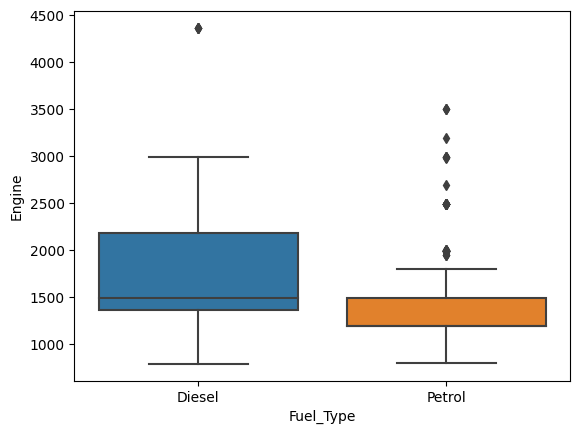

In [ ]:
import seaborn as sns
sns.boxplot(x = 'Fuel_Type' , y = 'Engine' , data=df3)

In [ ]:
df3.shape

(4030, 12)

In [ ]:
df3.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                32
Power                107
Seats                 34
Price                  0
dtype: int64

**Remove the outliers values in Engine for Diesel and petrol cars**
* Divide the data into two parts
  * Diesels cars
  * petrol cars

In [ ]:
dfd = df3[df3['Fuel_Type'] == 'Diesel']
dfp = df3[df3['Fuel_Type'] == 'Petrol']

In [ ]:
#Filtered Out outliers for diesel engine
q1 = dfd['Engine'].describe()[4]
q3 = dfd['Engine'].describe()[6]

iqr = q3 - q1

lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

#dfd = dfd[(dfd['Engine'] >= lf) & (dfd['Engine'] <= uf)]  => it will the missing or null values samples

In [ ]:
#Use data which is not within the lowwr fence and upper fence
dfd = dfd[~((dfd['Engine'] < lf) | (dfd['Engine'] > uf))]

In [ ]:
dfd.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                7
Power                36
Seats                 8
Price                 0
dtype: int64

In [ ]:
dfd['Engine'] = dfd['Engine'].fillna(dfd['Engine'].mean())
#filled the missing engine value with mean value of engine in diesel cars

In [ ]:
#Filter out outliers for petrol engine
q1 = dfp['Engine'].describe()[4]
q3 = dfp['Engine'].describe()[6]

iqr = q3 - q1

lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

dfp = dfp[~((dfp['Engine'] < lf) | (dfp['Engine'] > uf))]

In [ ]:
dfp['Engine'].isnull().sum()

25

In [ ]:
dfp['Engine'] = dfp['Engine'].fillna(dfp['Engine'].mean())

<ipython-input-72-c4ef2da4c579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Engine'] = dfp['Engine'].fillna(dfp['Engine'].mean())


In [ ]:
#Join back diesel and petrol cars

df4 = pd.concat((dfd,dfp))
df4

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & above,15.20,1968.0,140.80,5.0,17.74
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,volkswagen vento,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6000,hyundai i20,Bangalore,2014,68010,Petrol,Manual,Second & above,18.50,1197.0,82.85,5.0,5.25
6002,volkswagen vento,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.50,5.0,3.25
6003,maruti celerio,Bangalore,2015,67600,Petrol,Manual,First,23.10,998.0,67.04,5.0,4.00
6010,honda brio,Delhi,2013,33746,Petrol,Manual,First,18.50,1198.0,86.80,5.0,3.20


In [ ]:
(len(df3) - len(df4))/len(df3)

0.012903225806451613

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

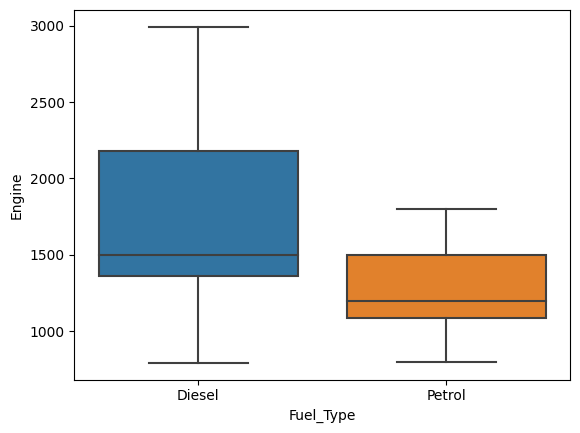

In [ ]:
import seaborn as sns
sns.boxplot(x = 'Fuel_Type' , y = 'Engine' , data=df4)

<Axes: xlabel='Fuel_Type', ylabel='Power'>

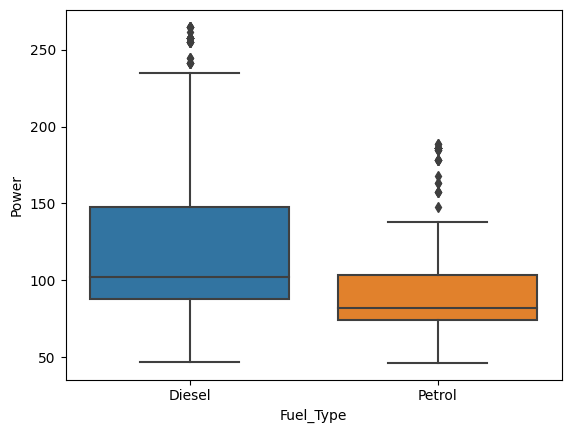

In [ ]:
sns.boxplot(x=df4['Fuel_Type'] ,y = df4['Power'])

In [ ]:
dfd = df4[df4['Fuel_Type'] == 'Diesel']
dfp = df4[df4['Fuel_Type'] == 'Petrol']

In [ ]:
#Filtered Out outliers for diesel engine
q1 = dfd['Power'].describe()[4]
q3 = dfd['Power'].describe()[6]

iqr = q3 - q1

lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

#dfd = dfd[(dfd['Power'] >= lf) & (dfd['Power'] <= uf)]    #we will not use it as it will remove missing values

dfd = dfd[~((dfd['Power'] < lf) | (dfd['Power'] > uf))]

In [ ]:
dfd['Power'].isnull().sum()

36

In [ ]:
dfd['Power'] = dfd['Power'].fillna(dfd['Power'].mean())

In [ ]:
#Filtered Out outliers for petrol engine
q1 = dfp['Power'].describe()[4]
q3 = dfp['Power'].describe()[6]

iqr = q3 - q1

lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

dfp = dfp[~((dfp['Power'] < lf) | (dfp['Power'] > uf))]

In [ ]:
dfp['Power'].isnull().sum()

70

In [ ]:
dfp['Power'] = dfp['Power'].fillna(dfp['Power'].mean())

<ipython-input-83-ce3635d5fa38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Power'] = dfp['Power'].fillna(dfp['Power'].mean())


In [ ]:
df5 = pd.concat((dfd,dfp))

<Axes: xlabel='Fuel_Type', ylabel='Power'>

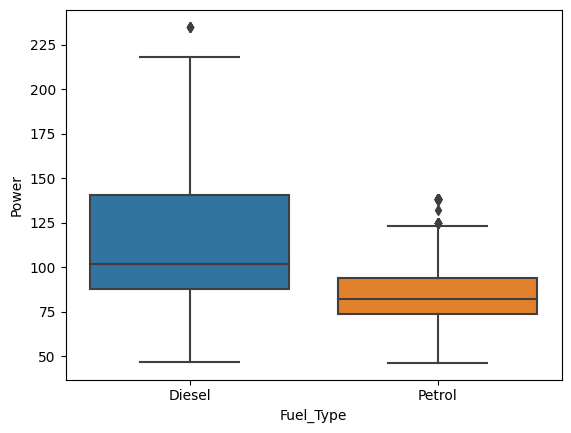

In [ ]:
sns.boxplot(x=df5['Fuel_Type'] ,y = df5['Power'])

<Axes: xlabel='Fuel_Type', ylabel='Mileage'>

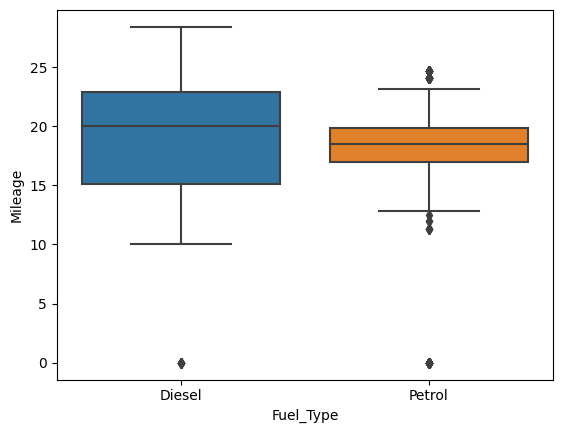

In [ ]:
sns.boxplot(x=df5['Fuel_Type'] ,y = df5['Mileage'])

In [ ]:
df5.groupby('Fuel_Type')['Mileage'].mean()

Fuel_Type
Diesel    19.397855
Petrol    18.124497
Name: Mileage, dtype: float64

In [ ]:
df5['Mileage'] = df5['Mileage'].fillna(19)

In [ ]:
df5.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                34
Price                 0
dtype: int64

In [ ]:
df5.shape

(3917, 12)

In [ ]:
df5.groupby('Name')['Seats'].max()

Name
audi a4                  5.0
bmw 3                    5.0
bmw 5                    5.0
ford ecosport            5.0
ford figo                5.0
honda amaze              5.0
honda brio               5.0
honda city               5.0
honda jazz               5.0
hyundai creta            5.0
hyundai eon              5.0
hyundai grand            5.0
hyundai i10              5.0
hyundai i20              5.0
hyundai santro           5.0
hyundai verna            5.0
hyundai xcent            5.0
land rover               7.0
mahindra scorpio         9.0
mahindra xuv500          7.0
maruti alto              5.0
maruti baleno            5.0
maruti celerio           5.0
maruti ciaz              5.0
maruti ertiga            7.0
maruti ritz              5.0
maruti swift             5.0
maruti wagon             5.0
mercedes-benz e-class    5.0
mercedes-benz new        5.0
renault duster           5.0
toyota corolla           5.0
toyota etios             5.0
toyota fortuner          7.0
toyota in

In [ ]:
df5.groupby('Name')['Seats'].max()['toyota corolla']

5.0

In [ ]:
#divide data into two parts
#part 1 - Missing seats information
#part 2 - with not missing sears information

dfs0 = df5[df5['Seats'].isnull()]
dfs1 = df5[~df5['Seats'].isnull()]

In [ ]:
def fix_missing_seats(x):
  return df5.groupby('Name')['Seats'].max()[x]

In [ ]:
fix_missing_seats('volkswagen vento')

5.0

In [ ]:
dfs0['Seats'] = dfs0['Name'].apply(fix_missing_seats)

<ipython-input-96-5aa3305467d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs0['Seats'] = dfs0['Name'].apply(fix_missing_seats)


In [ ]:
df6 = pd.concat((dfs0 , dfs1))   #Join back the data
df6.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,ford figo,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.000000,99.000000,5.0,3.60
749,land rover,Mumbai,2008,55001,Diesel,Automatic,Second & above,0.00,1773.932806,116.795351,7.0,26.50
2530,bmw 5,Kochi,2014,64158,Diesel,Automatic,First,18.48,1773.932806,116.795351,5.0,17.89
2623,bmw 5,Pune,2012,95000,Diesel,Automatic,Second & above,18.48,1773.932806,116.795351,5.0,18.00
3272,bmw 5,Mumbai,2008,81000,Diesel,Automatic,Second & above,18.48,1773.932806,116.795351,5.0,10.50


In [ ]:
df6.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
df6.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,ford figo,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.000000,99.000000,5.0,3.60
749,land rover,Mumbai,2008,55001,Diesel,Automatic,Second & above,0.00,1773.932806,116.795351,7.0,26.50
2530,bmw 5,Kochi,2014,64158,Diesel,Automatic,First,18.48,1773.932806,116.795351,5.0,17.89
2623,bmw 5,Pune,2012,95000,Diesel,Automatic,Second & above,18.48,1773.932806,116.795351,5.0,18.00
3272,bmw 5,Mumbai,2008,81000,Diesel,Automatic,Second & above,18.48,1773.932806,116.795351,5.0,10.50


In [ ]:
df6['Year'] = 2023 - df6['Year']

In [ ]:
df6.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,ford figo,Bangalore,8,70436,Diesel,Manual,First,0.00,1498.000000,99.000000,5.0,3.60
749,land rover,Mumbai,15,55001,Diesel,Automatic,Second & above,0.00,1773.932806,116.795351,7.0,26.50
2530,bmw 5,Kochi,9,64158,Diesel,Automatic,First,18.48,1773.932806,116.795351,5.0,17.89
2623,bmw 5,Pune,11,95000,Diesel,Automatic,Second & above,18.48,1773.932806,116.795351,5.0,18.00
3272,bmw 5,Mumbai,15,81000,Diesel,Automatic,Second & above,18.48,1773.932806,116.795351,5.0,10.50


In [ ]:
df6.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
df6.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000
mean,9.432984,57052.139392,18.774667,1500.755870,101.890796,5.288741,7.553595
std,3.015607,36642.169948,4.303714,478.325706,35.787267,0.760429,6.983358
min,4.000000,171.000000,0.000000,793.000000,46.300000,4.000000,0.650000
25%,7.000000,34063.000000,16.470000,1197.000000,78.000000,5.000000,3.600000
50%,9.000000,52910.000000,18.900000,1373.000000,88.730000,5.000000,5.470000
75%,11.000000,71346.000000,21.430000,1591.000000,118.000000,5.000000,8.250000
max,25.000000,720000.000000,28.400000,2993.000000,235.000000,9.000000,59.720000


In [ ]:
(df6['Mileage'] == 0).sum()

46

In [ ]:
df6.groupby('Fuel_Type')['Mileage'].mean()

Fuel_Type
Diesel    19.397855
Petrol    18.124497
Name: Mileage, dtype: float64

In [ ]:
df6.groupby('Fuel_Type')['Mileage'].median()

Fuel_Type
Diesel    20.0
Petrol    18.5
Name: Mileage, dtype: float64

In [ ]:
df6_m0 = df6[df6['Mileage'] == 0]        #data samples with mileage value 0
df6_m1 = df6[df6['Mileage'] != 0]        #data samples with mileage value non zero

In [ ]:
car_mlg = round(df6.groupby('Name')['Mileage'].mean(),2)
car_mlg

Name
audi a4                  16.77
bmw 3                    19.31
bmw 5                    18.75
ford ecosport            20.78
ford figo                19.44
honda amaze              22.05
honda brio               18.66
honda city               18.22
honda jazz               20.47
hyundai creta            17.56
hyundai eon              21.12
hyundai grand            20.24
hyundai i10              19.74
hyundai i20              19.54
hyundai santro            9.92
hyundai verna            19.40
hyundai xcent            21.71
land rover               10.46
mahindra scorpio         12.78
mahindra xuv500          15.55
maruti alto              22.08
maruti baleno            21.89
maruti celerio           23.42
maruti ciaz              24.25
maruti ertiga            21.04
maruti ritz              21.15
maruti swift             21.51
maruti wagon             19.61
mercedes-benz e-class    13.02
mercedes-benz new        16.82
renault duster           19.31
toyota corolla           15.41
toy

In [ ]:
def car_mileage(x):
  return car_mlg[x]

In [ ]:
car_mileage('toyota innova')

12.78

In [ ]:
df6_m0['Mileage'] =  df6_m0['Name'].apply(car_mileage)

<ipython-input-111-54910b7d2963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_m0['Mileage'] =  df6_m0['Name'].apply(car_mileage)


In [ ]:
df7 = pd.concat((df6_m0,df6_m1), axis='rows')
df7.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,ford figo,Bangalore,8,70436,Diesel,Manual,First,19.44,1498.000000,99.000000,5.0,3.60
749,land rover,Mumbai,15,55001,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0,26.50
4152,land rover,Mumbai,20,75000,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0,16.11
194,honda city,Ahmedabad,16,60006,Petrol,Manual,First,18.22,1243.808533,86.340920,5.0,2.95
1385,honda city,Pune,19,115000,Petrol,Manual,Second & above,18.22,1243.808533,86.340920,5.0,1.50


<Axes: xlabel='Fuel_Type', ylabel='Mileage'>

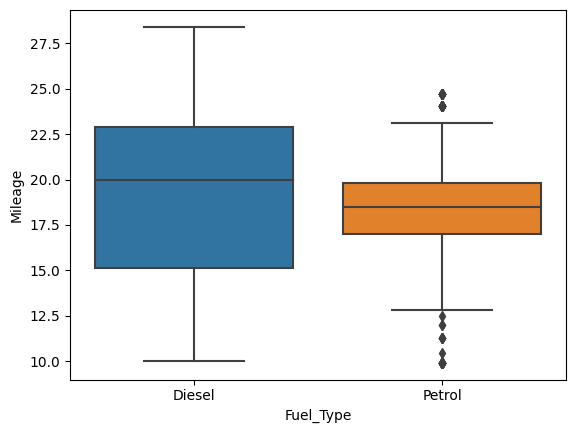

In [ ]:
sns.boxplot(x = df7['Fuel_Type'] , y = df7['Mileage'])

<Axes: xlabel='Fuel_Type', ylabel='Power'>

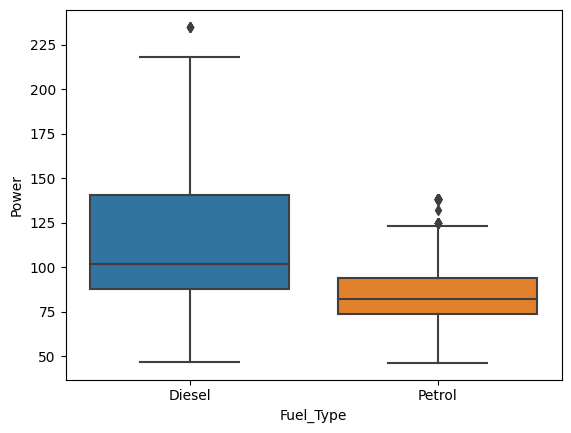

In [ ]:
sns.boxplot(x = df7['Fuel_Type'] , y = df7['Power'])

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

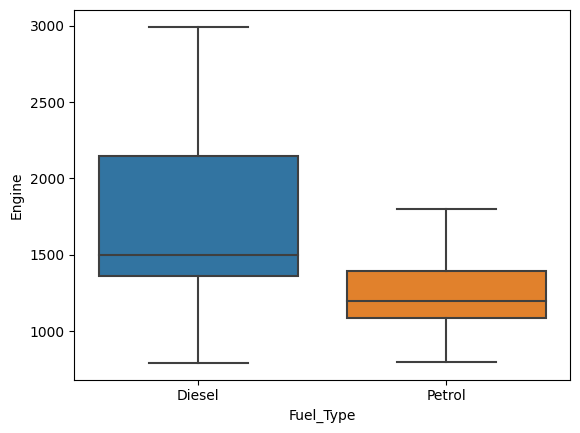

In [ ]:
sns.boxplot(x = df7['Fuel_Type'] , y = df7['Engine'])

In [ ]:
df7.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,ford figo,Bangalore,8,70436,Diesel,Manual,First,19.44,1498.000000,99.000000,5.0,3.60
749,land rover,Mumbai,15,55001,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0,26.50
4152,land rover,Mumbai,20,75000,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0,16.11
194,honda city,Ahmedabad,16,60006,Petrol,Manual,First,18.22,1243.808533,86.340920,5.0,2.95
1385,honda city,Pune,19,115000,Petrol,Manual,Second & above,18.22,1243.808533,86.340920,5.0,1.50


In [ ]:
X = df7.drop('Price' , axis='columns')
Y = df7['Price']

In [ ]:
X.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
229,ford figo,Bangalore,8,70436,Diesel,Manual,First,19.44,1498.000000,99.000000,5.0
749,land rover,Mumbai,15,55001,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0
4152,land rover,Mumbai,20,75000,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0
194,honda city,Ahmedabad,16,60006,Petrol,Manual,First,18.22,1243.808533,86.340920,5.0
1385,honda city,Pune,19,115000,Petrol,Manual,Second & above,18.22,1243.808533,86.340920,5.0


In [ ]:
dfn = pd.get_dummies(X['Name'])
dfl = pd.get_dummies(X['Location'])
dff = pd.get_dummies(X['Fuel_Type'])
dft = pd.get_dummies(X['Transmission'])
dfo = pd.get_dummies(X['Owner_Type'])

In [ ]:
Xt = pd.concat((X, dfn,dfl,dff,dft,dfo), axis= 'columns').drop(['Name','Location',
                                                                'Fuel_Type','Transmission','Owner_Type'],
                                                               axis='columns')
Xt.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,audi a4,bmw 3,bmw 5,ford ecosport,...,Kochi,Kolkata,Mumbai,Pune,Diesel,Petrol,Automatic,Manual,First,Second & above
229,8,70436,19.44,1498.000000,99.000000,5.0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
749,15,55001,10.46,1773.932806,116.795351,7.0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4152,20,75000,10.46,1773.932806,116.795351,7.0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
194,16,60006,18.22,1243.808533,86.340920,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1385,19,115000,18.22,1243.808533,86.340920,5.0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Y)

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytrainP = model1.predict(xtrain)
ytestP = model1.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Train Mean Absolute_error' , mean_absolute_error(ytrain,ytrainP))
print('Test Mean Absolute_error' , mean_absolute_error(ytest,ytestP))

Train Mean Absolute_error 1.5126074436520849
Test Mean Absolute_error 1.506252473532922


In [ ]:
print('Train r2_score' , r2_score(ytrain,ytrainP))
print('Test r2_score' , r2_score(ytest,ytestP))

Train r2_score 0.853748415792993
Test r2_score 0.8653072101617727


* Log transformation

In [ ]:
Xt.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,audi a4,bmw 3,bmw 5,ford ecosport,...,Kochi,Kolkata,Mumbai,Pune,Diesel,Petrol,Automatic,Manual,First,Second & above
229,8,70436,19.44,1498.000000,99.000000,5.0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
749,15,55001,10.46,1773.932806,116.795351,7.0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4152,20,75000,10.46,1773.932806,116.795351,7.0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
194,16,60006,18.22,1243.808533,86.340920,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1385,19,115000,18.22,1243.808533,86.340920,5.0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


In [ ]:
Y

229      3.60
749     26.50
4152    16.11
194      2.95
1385     1.50
        ...  
6000     5.25
6002     3.25
6003     4.00
6010     3.20
6017     2.65
Name: Price, Length: 3917, dtype: float64

In [ ]:
print(Y.mean())
print(Y.median())

7.553594587694664
5.47


<Axes: >

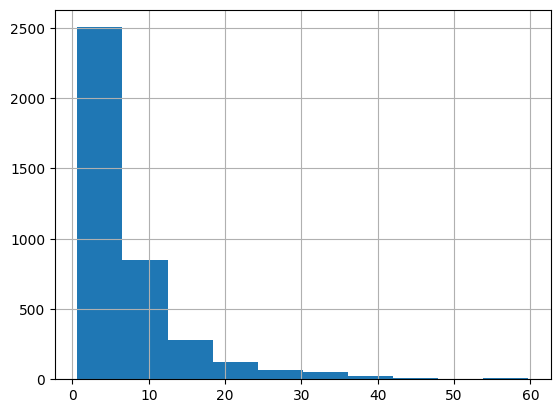

In [ ]:
Y.hist()

In [ ]:
Yt = np.log(Y)
Yt

229     1.280934
749     3.277145
4152    2.779440
194     1.081805
1385    0.405465
          ...   
6000    1.658228
6002    1.178655
6003    1.386294
6010    1.163151
6017    0.974560
Name: Price, Length: 3917, dtype: float64

In [ ]:
print(Yt.mean())
print(Yt.median())

1.7447421309553968
1.6992786164338898


<Axes: >

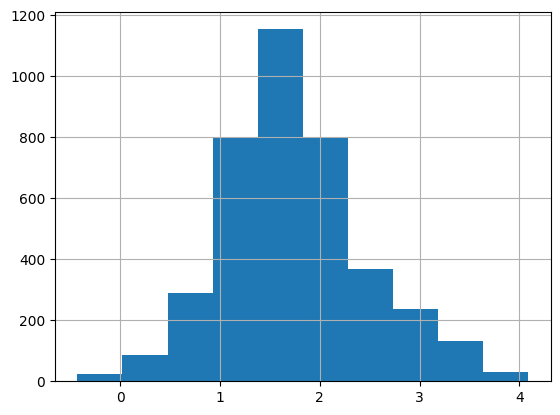

In [ ]:
Yt.hist()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

model2.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytrainP = model2.predict(xtrain)
ytestP = model2.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Train Mean Absolute_error' , mean_absolute_error(ytrain,ytrainP))
print('Test Mean Absolute_error' , mean_absolute_error(ytest,ytestP))

Train Mean Absolute_error 0.10885595263398902
Test Mean Absolute_error 0.11126664789614987


In [ ]:
print('Train Mean Absolute_error' , np.exp(mean_absolute_error(ytrain,ytrainP)))
print('Test Mean Absolute_error' , np.exp(mean_absolute_error(ytest,ytestP)))

Train Mean Absolute_error 1.1150017257112617
Test Mean Absolute_error 1.1176928975830744


In [ ]:
print('Train r2_score' , r2_score(ytrain,ytrainP))
print('Test r2_score' , r2_score(ytest,ytestP))

Train r2_score 0.9561423464425863
Test r2_score 0.9562865649831425


**predictions**

In [ ]:
df7.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,ford figo,Bangalore,8,70436,Diesel,Manual,First,19.44,1498.000000,99.000000,5.0,3.60
749,land rover,Mumbai,15,55001,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0,26.50
4152,land rover,Mumbai,20,75000,Diesel,Automatic,Second & above,10.46,1773.932806,116.795351,7.0,16.11
194,honda city,Ahmedabad,16,60006,Petrol,Manual,First,18.22,1243.808533,86.340920,5.0,2.95
1385,honda city,Pune,19,115000,Petrol,Manual,Second & above,18.22,1243.808533,86.340920,5.0,1.50


In [ ]:
car_name = "honda city"
location = "Mumbai"
year = 5
kms_driven = 50000
fuel_type = "Diesel"
trans = "Manual"
owner_type = "First"
mileage = 18
engine = 1300
power = 85
seats = 5

In [ ]:
xtrain.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'audi a4', 'bmw 3', 'bmw 5', 'ford ecosport', 'ford figo',
       'honda amaze', 'honda brio', 'honda city', 'honda jazz',
       'hyundai creta', 'hyundai eon', 'hyundai grand', 'hyundai i10',
       'hyundai i20', 'hyundai santro', 'hyundai verna', 'hyundai xcent',
       'land rover', 'mahindra scorpio', 'mahindra xuv500', 'maruti alto',
       'maruti baleno', 'maruti celerio', 'maruti ciaz', 'maruti ertiga',
       'maruti ritz', 'maruti swift', 'maruti wagon', 'mercedes-benz e-class',
       'mercedes-benz new', 'renault duster', 'toyota corolla', 'toyota etios',
       'toyota fortuner', 'toyota innova', 'volkswagen polo',
       'volkswagen vento', 'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore',
       'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune',
       'Diesel', 'Petrol', 'Automatic', 'Manual', 'First', 'Second & above'],
      dtype='object')

In [ ]:
input = np.zeros(len(xtrain.columns))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
input[0] = year
input[1] = kms_driven
input[2] = mileage
input[3] = engine
input[4] = power
input[5] = seats

print(input)

[5.0e+00 5.0e+04 1.8e+01 1.3e+03 8.5e+01 5.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]


In [ ]:
input[list(xtrain.columns).index(car_name)] = 1
input[list(xtrain.columns).index(location)] = 1
input[list(xtrain.columns).index(fuel_type)] = 1
input[list(xtrain.columns).index(trans)] = 1
input[list(xtrain.columns).index(owner_type)] = 1

print(input)

[5.0e+00 5.0e+04 1.8e+01 1.3e+03 8.5e+01 5.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00
 1.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00]


In [ ]:
print(model1.predict([input]))

[8.95676493]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(np.exp(model2.predict([input])))

[8.95070127]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
k = 9
print(np.log(k))
print(np.exp(np.log(k)))

2.1972245773362196
9.000000000000002


**Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge
model3 = Ridge(alpha=0.1)

model3.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [ ]:
ytrainP = model3.predict(xtrain)
ytestP = model3.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Train Mean Absolute_error' , np.exp(mean_absolute_error(ytrain,ytrainP)))
print('Test Mean Absolute_error' , np.exp(mean_absolute_error(ytest,ytestP)))

print('Train r2_score' , r2_score(ytrain,ytrainP))
print('Test r2_score' , r2_score(ytest,ytestP))

Train Mean Absolute_error 1.1149864117442836
Test Mean Absolute_error 1.117833155312602
Train r2_score 0.9561159610755671
Test r2_score 0.95613501237241


**Lasso**

In [ ]:
from sklearn.linear_model import Lasso
model4 = Lasso(alpha=0.0001)

model4.fit(xtrain,ytrain)

Lasso(alpha=0.0001)

In [ ]:
ytrainP = model4.predict(xtrain)
ytestP = model4.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Train Mean Absolute_error' , np.exp(mean_absolute_error(ytrain,ytrainP)))
print('Test Mean Absolute_error' , np.exp(mean_absolute_error(ytest,ytestP)))

print('Train r2_score' , r2_score(ytrain,ytrainP))
print('Test r2_score' , r2_score(ytest,ytestP))

Train Mean Absolute_error 1.115707969301361
Test Mean Absolute_error 1.1194716666377795
Train r2_score 0.9555933152808834
Test r2_score 0.9550180613452225


**Save and Reuse your Model**

In [ ]:
import pickle

In [ ]:
with open("mymodel.pickle","wb") as f:
  f.write(pickle.dumps(model2))

In [ ]:
list(xtrain.columns)

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'audi a4',
 'bmw 3',
 'bmw 5',
 'ford ecosport',
 'ford figo',
 'honda amaze',
 'honda brio',
 'honda city',
 'honda jazz',
 'hyundai creta',
 'hyundai eon',
 'hyundai grand',
 'hyundai i10',
 'hyundai i20',
 'hyundai santro',
 'hyundai verna',
 'hyundai xcent',
 'land rover',
 'mahindra scorpio',
 'mahindra xuv500',
 'maruti alto',
 'maruti baleno',
 'maruti celerio',
 'maruti ciaz',
 'maruti ertiga',
 'maruti ritz',
 'maruti swift',
 'maruti wagon',
 'mercedes-benz e-class',
 'mercedes-benz new',
 'renault duster',
 'toyota corolla',
 'toyota etios',
 'toyota fortuner',
 'toyota innova',
 'volkswagen polo',
 'volkswagen vento',
 'Ahmedabad',
 'Bangalore',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Mumbai',
 'Pune',
 'Diesel',
 'Petrol',
 'Automatic',
 'Manual',
 'First',
 'Second & above']

In [ ]:
import json

column_data = {"columns" : list(xtrain.columns)}

json.dumps(column_data)


with open("my_columns.json","w") as f:
  f.write(json.dumps(column_data))